# Africa Credit Challenge

The goals of this `starter notebook` are:

1. How to load data into a `Pandas` dataframe

2. How to `train` a basic machine learning model

3. How to `evaluate` the model

4. How to `save` your __submission__ following the required format.

<font color="red"><b>Note: This is just a starter notebook. It is by no means an ideal solution.</b></font>

In [90]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the data

In [91]:
# Loading the train dataset
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

# Display the first few rows of the datasets and their shape
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

ID  customer_id country_id  tbl_loan_id  lender_id  \
0  ID_266671248032267278       266671      Kenya       248032     267278   
1  ID_248919228515267278       248919      Kenya       228515     267278   
2  ID_308486370501251804       308486      Kenya       370501     251804   
3  ID_266004285009267278       266004      Kenya       285009     267278   
4  ID_253803305312267278       253803      Kenya       305312     267278   

  loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
0    Type_1        8448.0                 8448.0        2022-08-30   
1    Type_1       25895.0                25979.0        2022-07-30   
2    Type_7        6900.0                 7142.0        2024-09-06   
3    Type_1        8958.0                 9233.0        2022-10-20   
4    Type_1        4564.0                 4728.0        2022-11-28   

     due_date  duration New_versus_Repeat  Amount_Funded_By_Lender  \
0  2022-09-06         7       Repeat Loan                   120.85   
1  2022-08-06         7       Repeat Loan                  7768.50   
2  2024-09-13         7       Repeat Loan                  1380.00   
3  2022-10-27         7       Repeat Loan                  2687.40   
4  2022-12-05         7       Repeat Loan                  1369.20   

   Lender_portion_Funded  Lender_portion_to_be_repaid  target  
0               0.014305                        121.0       0  
1               0.300000                       7794.0       0  
2               0.200000                       1428.0       0  
3               0.300000                       2770.0       0  
4               0.300000                       1418.0       0

(68654, 16)

'Test'

ID  customer_id country_id  tbl_loan_id  lender_id  \
0  ID_269404226088267278       269404      Kenya       226088     267278   
1  ID_255356300042267278       255356      Kenya       300042     267278   
2  ID_257026243764267278       257026      Kenya       243764     267278   
3  ID_264617299409267278       264617      Kenya       299409     267278   
4  ID_247613296713267278       247613      Kenya       296713     267278   

  loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
0    Type_1        1919.0                 1989.0        2022-07-27   
1    Type_1        2138.0                 2153.0        2022-11-16   
2    Type_1        8254.0                 8304.0        2022-08-24   
3    Type_1        3379.0                 3379.0        2022-11-15   
4    Type_1         120.0                  120.0        2022-11-10   

     due_date  duration New_versus_Repeat  Amount_Funded_By_Lender  \
0  2022-08-03         7       Repeat Loan                    575.7   
1  2022-11-23         7       Repeat Loan                      0.0   
2  2022-08-31         7       Repeat Loan                    207.0   
3  2022-11-22         7       Repeat Loan                   1013.7   
4  2022-11-17         7       Repeat Loan                     36.0   

   Lender_portion_Funded  Lender_portion_to_be_repaid  
0               0.300000                        597.0  
1               0.000000                          0.0  
2               0.025079                        208.0  
3               0.300000                       1014.0  
4               0.300000                         36.0

(18594, 15)

In [92]:
# Check column types & missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [94]:
train.loc[:, train.columns != 'ID'].shape

(68654, 15)

In [96]:
train.loc[:, train.columns != 'ID']['tbl_loan_id'].value_counts()

tbl_loan_id
372036    2
367976    2
306263    2
367233    2
373890    2
370248    2
368197    2
367537    2
360792    2
371807    2
357580    2
305974    2
371710    2
306392    2
368070    2
298920    2
374021    2
369841    2
368027    2
250345    2
370215    2
367184    2
368888    2
373445    2
371298    2
367550    2
370955    2
272758    2
360480    2
360237    2
204356    2
288758    2
307124    2
367816    2
367075    2
306026    2
359752    2
369515    2
373639    2
374275    2
249827    2
372821    2
369214    2
367345    2
372944    2
370257    2
280681    2
372950    2
209148    2
306020    2
240451    2
369765    2
303324    2
238816    2
369583    2
306061    2
306525    2
367936    2
357479    2
374089    2
374276    2
372438    2
369834    2
272958    2
374265    2
270087    2
374728    2
306159    2
374057    2
289067    2
369725    2
367935    2
375290    2
370603    2
283999    2
292909    2
367992    2
306372    2
369696    2
367604    2
307438    2
367329    2
3604

## EDA

### target

In [44]:
train['target'].value_counts(normalize=True) * 100

target
0    98.167623
1     1.832377
Name: proportion, dtype: float64

**IMBALANCED DATASET**

### customer_id

In [4]:
# Are there missing values in the train dataset ?
print(f"There are {train.isna().sum().sum()} missing values in the data.")

There are 0 missing values in the data.


In [24]:
# total number of rows
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (68654, 16)
Test: (18594, 15)


In [29]:
# Check unique customer_id
print(f"Train: {len(train['customer_id'].unique())} - {100 * len(train['customer_id'].unique())/train.shape[0]}")
print(f"Test: {len(test['customer_id'].unique())} - {100 * len(test['customer_id'].unique())/test.shape[0]}")

Train: 6540 - 9.526029073324205
Test: 4962 - 26.686027750887384


customer_id
247613    208
250874    192
259757    135
255356    128
249457    119
         ... 
246901      1
268437      1
273543      1
254894      1
248427      1
Name: count, Length: 6540, dtype: int64


<Axes: >

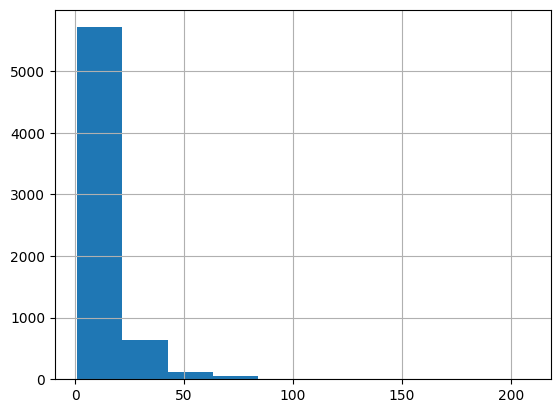

In [37]:
# Number of times a customer appears
print(train['customer_id'].value_counts())
train['customer_id'].value_counts().hist()

customer_id
296718    60
296758    55
296992    47
297596    46
296562    46
          ..
259117     1
246655     1
296580     1
239632     1
252341     1
Name: count, Length: 4962, dtype: int64


<Axes: >

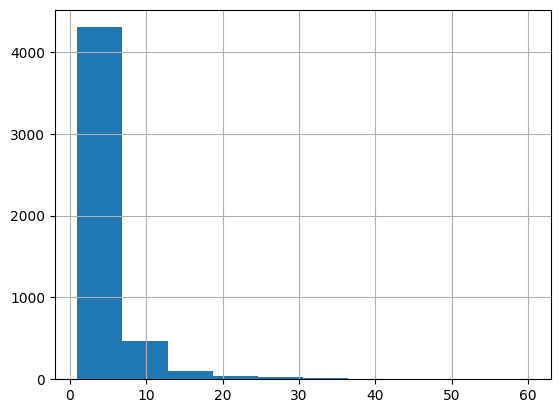

In [38]:
# Number of times a customer appears in test data
print(test['customer_id'].value_counts())
test['customer_id'].value_counts().hist()

In [42]:
customer_in_train_only = set(train['customer_id']) - set(test['customer_id'])
print(f"Number of customer in train only: {len(customer_in_train_only)}")

customer_in_test_only = set(test['customer_id']) - set(train['customer_id'])
print(f"Number of customer in test only: {len(customer_in_test_only)}")

Number of customer in train only: 2234
Number of customer in test only: 656


### customer_id VS target

In [65]:
pd.set_option('display.max_rows', train.shape[0]+1)

train[['customer_id', 'target']].groupby(['customer_id']) \
    .aggregate(['size', 'sum']) \
    .sort_values([('target', 'size')], ascending=False)

target    
              size sum
customer_id           
247613         208   0
250874         192   0
259757         135   0
255356         128   0
249457         119   0
262000         116   0
260083         115   0
253737         102   0
254014         101   0
246888         101   0
263235          99   0
247304          91   0
259729          90   0
249366          89   0
241430          88   0
258983          88   0
12897           88   0
249405          88   0
252103          85   0
241346          82   0
247038          81   0
248927          81   0
241647          80   0
249279          80   0
242329          79   0
262689          79   0
253927          78   0
262561          77   0
256361          76   0
245895          76   0
254227          76   0
263861          76   0
250153          76   0
240842          75   0
254128          75   0
257379          74   0
245095          74   0
259457          74   0
261570          74   0
258344          74   0
262903          73   0
265568          73   0
251897          73   0
247871          72   0
247850          72   0
257619          70   0
252775          70   0
264168          69   0
259525          69   0
243233          68   0
257889          68   0
261199          68   0
242351          67   0
254526          67   0
240047          67   0
250235          67   0
251105          66   0
246079          66   0
263585          65   0
240678          65   0
190905          65   0
251692          65   0
259693          64   0
252952          64   0
252492          64   0
239456          64   0
255130          63   0
263376          63   0
239491          62   0
254380          62   0
240359          62   0
266671          61   0
262962          61   0
255429          60   0
244565          60   0
8454            60   2
266568          60   0
250775          59   0
263180          59   0
263665          59   0
256201          59   0
262388          59   0
244757          58   0
261232          58   0
260863          58   0
253896          57   0
258074          57   0
265607          57   0
242995          57   0
252932          56   0
250994          56   0
260174          56   0
251200          56   0
256841          55   0
262240          55   0
260626          55   0
249996          55   0
261026          55   0
242775          55   0
253278          54   0
243976          54   0
241610          54   0
259835          54   0
242767          54   0
250357          54   0
249579          53   0
259611          53   0
264826          52   0
261487          52   0
261535          52   4
251410          52   0
266202          52   0
260969          52   0
259137          52   0
256054          51   0
250825          51   0
253136          51   0
260435          51   0
240798          51   0
252060          50   0
248895          50   0
253174          50   0
249583          50   0
267330          50   0
257301          50   0
251260          50   0
245353          49   0
258606          49   0
257273          48   0
251499          48   0
254671          48   0
257387          48   0
259749          47   0
256419          47   0
261145          47   0
266297          47   2
262550          47   0
213815          47   0
252537          47   0
248569          47   0
261746          47   0
259206          46   0
257099          46   0
253432          46   0
266801          46   0
261209          46   0
241573          46   0
243095          46   0
259241          46   0
259528          46   0
252690          46   0
257440          46   0
251769          46   0
253837          46   0
257613          46   0
266661          45   0
266419          45   0
256188          45   0
249259          45   0
259276          45   0
260007          45   1
239792          45   0
251741          45   0
241687          44   0
259880          44   0
242138          44   0
269496          44   0
250156          44   0
259876          44   0
249946          44   0
261406          44   0
259476    

In [80]:
# filter customer who has not defaulted at least once
pd.set_option('display.max_rows', train.shape[0]+1)

train[['customer_id', 'target']].groupby(['customer_id']) \
    .filter(lambda x: x.target.sum() > 0) \
    .groupby(['customer_id']) \
    .aggregate(['size', 'sum']) \
    .sort_values([('target', 'size')], ascending=False)

target    
              size sum
customer_id           
8454            60   2
261535          52   4
266297          47   2
260007          45   1
252513          37   1
246434          37   1
261104          36   1
260248          31   1
263482          30   1
261841          30   2
252807          28   1
252540          28   1
248375          28   1
243332          26   2
256615          25   2
249229          25   2
259636          25   1
100464          24   2
252536          24   1
251644          24   2
308977          23   2
258228          23   2
241828          23   2
262040          23   1
248684          22   2
256554          21   1
242918          21   1
245399          20   1
248853          20   1
270766          20   1
246550          20   2
269118          20   1
269822          19   1
310119          19   2
308629          19   2
253353          19   1
245435          19   2
245968          19   1
250594          19   1
249194          19   2
309363          19   2
243598          18   1
252905          18   1
97633           18   1
308377          18   2
249309          18   2
263718          18   2
273307          18  13
308504          17   2
249931          17   2
244279          17   2
199820          17   2
261588          16   1
308579          16   2
268660          16   1
250307          16   1
309041          16   2
247838          16   2
99358           16   1
248850          16   1
247643          16   1
246549          16   2
248456          16   2
259139          16   1
256582          15   2
270823          15   1
268400          15   1
261581          15   2
252841          15   1
261493          15   1
262395          15   2
308870          15   2
268938          15   1
245623          15   1
263945          14   1
241824          14   1
256868          14   2
269735          14   2
308506          14   1
247625          14   1
246051          14   1
251616          14   2
258861          14   1
247158          14   1
247107          14   2
238927          14   2
246091          14   2
238716          14   1
251748          14   1
272717          14   6
264000          14   1
244219          13   3
308885          13   2
249176          13   1
266265          13   1
254032          13   1
253524          13   1
260384          13   1
268566          13   1
308909          13   2
240065          13   2
245876          13   1
243129          13   2
269326          12   2
249418          12   1
271305          12   2
262477          12   1
308502          12   2
311529          12   2
246777          12   1
243588          12   1
309144          12   2
260006          12   1
308959          12   2
248670          12   1
258764          12   1
260101          12   1
248255          12   1
266788          12   1
309060          12   2
257780          12   1
238063          12   1
309071          11   1
308934          11   2
270682          11   1
265690          11   2
258103          11   1
308974          11   4
262061          11   1
245220          11   4
288739          11   1
250297          11   1
249830          11   2
245154          11   1
261204          11   1
266723          11   2
246915          11   1
261118          11   1
271163          11   1
309066          11   2
244876          11   1
247695          11   1
268784          11   1
266994          11   2
251474          10   1
262415          10   1
251199          10   1
238342          10   2
265290          10   1
265632          10   1
273584          10   2
256869          10   1
264959          10   1
273705          10   2
269445          10   1
270169          10   2
250155          10   1
288743          10   2
242044          10   2
267947          10   2
254249          10   1
244754          10   1
249235           9   1
248615           9   2
264470           9   2
263193           9   1
308430           9   2
263326           9   1
247169           9   1
288536           9   1
308449           9   2
245448    

We can understand that
- there are people who didn't default on their first loan
- there are people who didn't default on each of their loan
- other didn't default on some (rare) laon

### country_id

In [81]:
train['country_id'].value_counts(normalize=True) * 100

country_id
Kenya    100.0
Name: proportion, dtype: float64

In [82]:
test['country_id'].value_counts(normalize=True) * 100

country_id
Kenya    81.042272
Ghana    18.957728
Name: proportion, dtype: float64

only one country represented in train data but two in test data.
we will categorize it with unknown label for not seen label

### tbl_loan_id

In [84]:
len(train['tbl_loan_id'].unique())

66520

In [85]:
train.shape

(68654, 16)

In [86]:
train['tbl_loan_id'].value_counts()

tbl_loan_id
372036    2
367976    2
306263    2
367233    2
373890    2
370248    2
368197    2
367537    2
360792    2
371807    2
357580    2
305974    2
371710    2
306392    2
368070    2
298920    2
374021    2
369841    2
368027    2
250345    2
370215    2
367184    2
368888    2
373445    2
371298    2
367550    2
370955    2
272758    2
360480    2
360237    2
204356    2
288758    2
307124    2
367816    2
367075    2
306026    2
359752    2
369515    2
373639    2
374275    2
249827    2
372821    2
369214    2
367345    2
372944    2
370257    2
280681    2
372950    2
209148    2
306020    2
240451    2
369765    2
303324    2
238816    2
369583    2
306061    2
306525    2
367936    2
357479    2
374089    2
374276    2
372438    2
369834    2
272958    2
374265    2
270087    2
374728    2
306159    2
374057    2
289067    2
369725    2
367935    2
375290    2
370603    2
283999    2
292909    2
367992    2
306372    2
369696    2
367604    2
307438    2
367329    2
3604

We are supposed to have an unique loan_id. But most of them are double.

In [87]:
train[train['tbl_loan_id'] == 372036]

ID  customer_id country_id  tbl_loan_id  lender_id  \
17147  ID_308989372036251804       308989      Kenya       372036     251804   
61856  ID_308989372036267278       308989      Kenya       372036     267278   

      loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
17147    Type_7       37700.0                39020.0        2024-09-27   
61856    Type_7       37700.0                39020.0        2024-09-27   

         due_date  duration New_versus_Repeat  Amount_Funded_By_Lender  \
17147  2024-10-04         7       Repeat Loan                   7540.0   
61856  2024-10-04         7       Repeat Loan                   7540.0   

       Lender_portion_Funded  Lender_portion_to_be_repaid  target  
17147                    0.2                       7804.0       0  
61856                    0.2                       7804.0       0

In [97]:
# check for number of duplicate
# train.loc[:, train.columns != 'ID'].drop_duplicates()
train.drop_duplicates(subset=['tbl_load_id']).head()

KeyError: Index(['tbl_load_id'], dtype='object')

In [5]:
def plot_continuous(df, column, transform=None):
    """
    Plots visualizations for a continuous variable, showing the distribution and boxplot for both
    the original and transformed versions of the data.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name of the continuous variable to plot.
        transform (str, optional): Transformation to apply to the data before plotting.
                                  Accepted values are 'log' or 'sqrt'. Default is None, which means no transformation.

    This function generates:
        - A histogram with a kernel density estimate (KDE) for the original data.
        - A boxplot for the original data.
        - If a transformation is specified ('log' or 'sqrt'):
            - A histogram with a KDE for the transformed data.
            - A boxplot for the transformed data.
    """
    # Create subplots for visualizations
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Original data plots
    sns.histplot(df[column], kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Distribution of {column}')
    axs[0, 0].set_xlabel(column)

    sns.boxplot(y=df[column], ax=axs[1, 0])
    axs[1, 0].set_title(f'Box Plot of {column}')
    axs[1, 0].set_ylabel(column)

    # Transformations (log or square root)
    if transform == 'log':
        transformed_data = np.log1p(df[column])  # log1p handles log(0) gracefully
        transform_label = 'Log'
    elif transform == 'sqrt':
        transformed_data = np.sqrt(df[column])  # Square root transformation
        transform_label = 'Square Root'
    else:
        transformed_data = None  # No transformation if not specified

    # If transformed data exists, generate corresponding plots
    if transformed_data is not None:
        sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
        axs[0, 1].set_title(f'{transform_label} Distribution of {column}')
        axs[0, 1].set_xlabel(f'{transform_label}({column})')

        sns.boxplot(y=transformed_data, ax=axs[1, 1])
        axs[1, 1].set_title(f'{transform_label} Box Plot of {column}')
        axs[1, 1].set_ylabel(f'{transform_label}({column})')
    else:
        # If no transformation, remove the second set of axes
        for ax in [axs[0, 1], axs[1, 1]]:
            ax.remove()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


def plot_categorical(df, column):
    """
    Plots visualizations for a categorical variable, including a bar plot and a pie chart.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name of the categorical variable to plot.

    This function generates:
        - A bar plot showing the counts of each category in the specified column.
        - A pie chart showing the relative proportions of each category.
    """
    # Create subplots for visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Bar plot showing counts of each category
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
    ax1.set_title(f'Bar Plot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Pie chart showing percentage distribution of each category
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax2.set_title(f'Pie Chart of {column}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


#### Categorical exploration

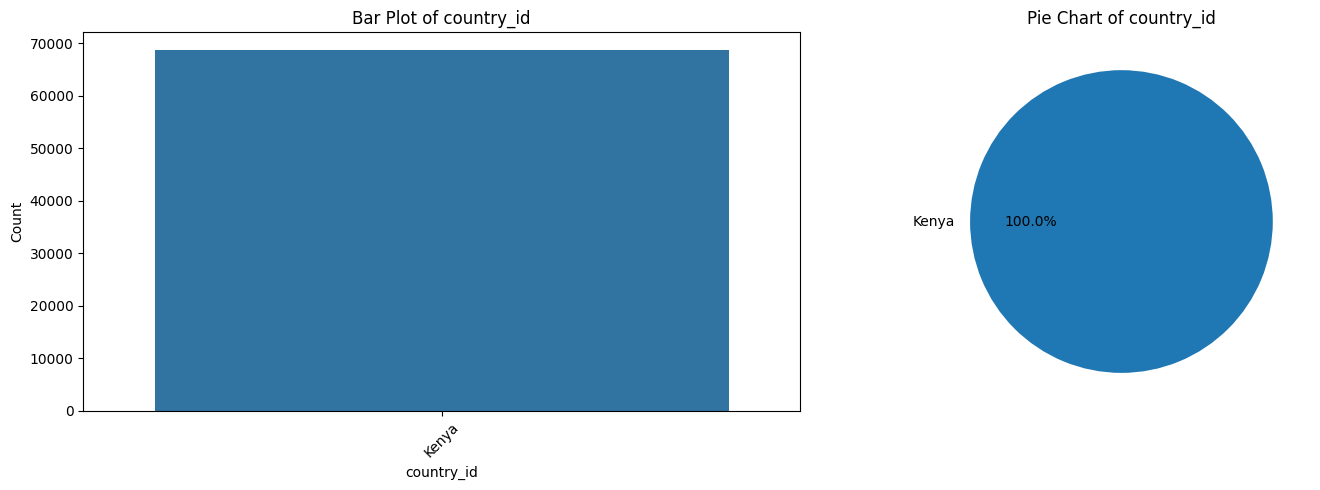

In [6]:
plot_categorical(train, 'country_id')

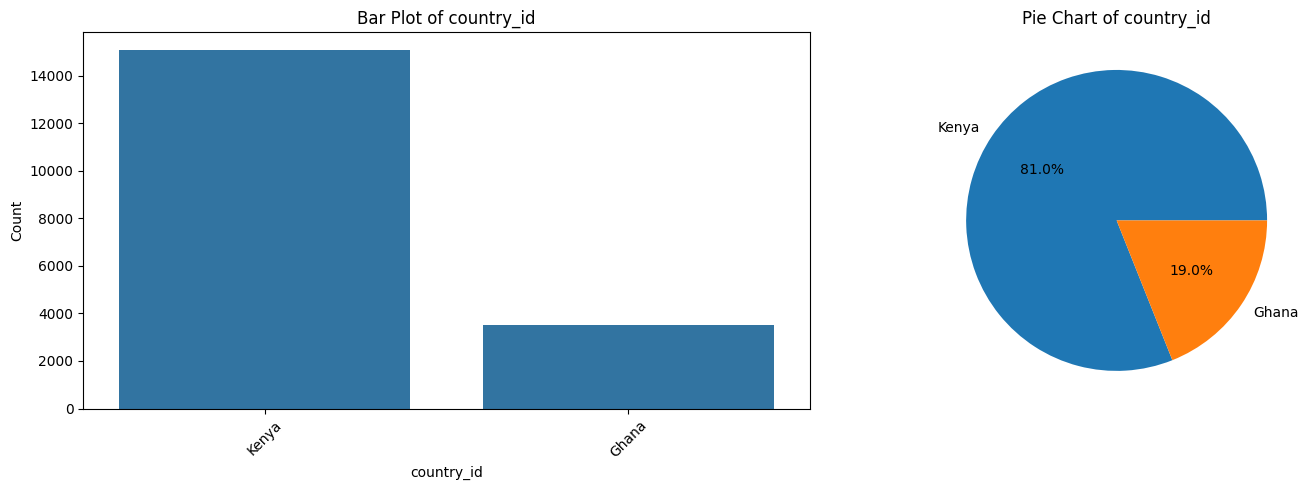

In [7]:
plot_categorical(test, 'country_id')

##### This shows that test has a new country, ghana so one of the goals is to build a solution that can generalize well in new regions

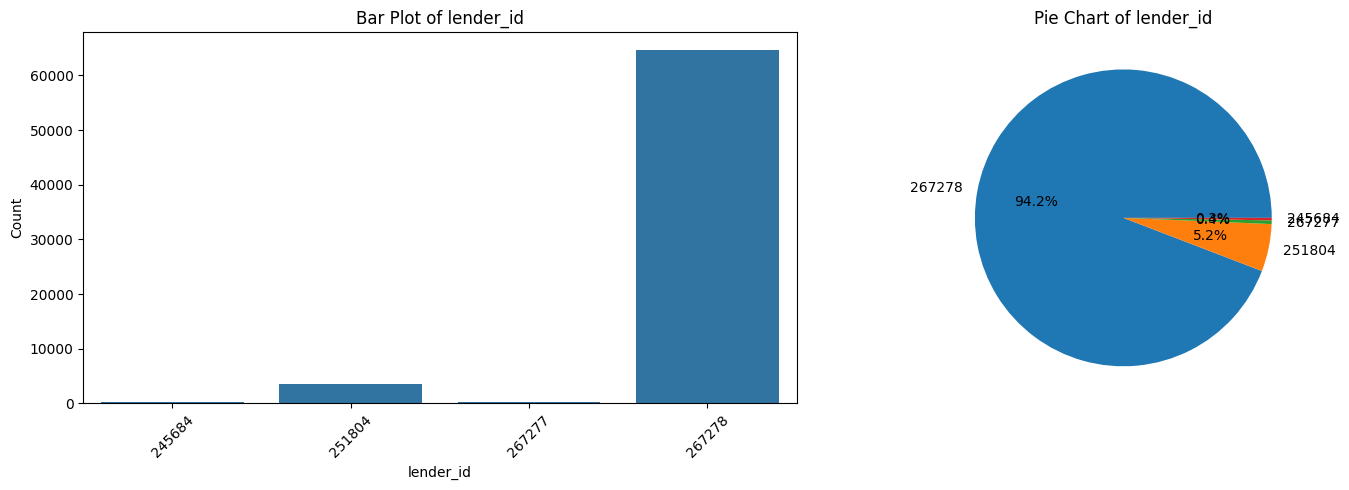

In [8]:
plot_categorical(train, 'lender_id')

##### You can exploree more of the categorical columns as well

#### TARGET EXPLORATION


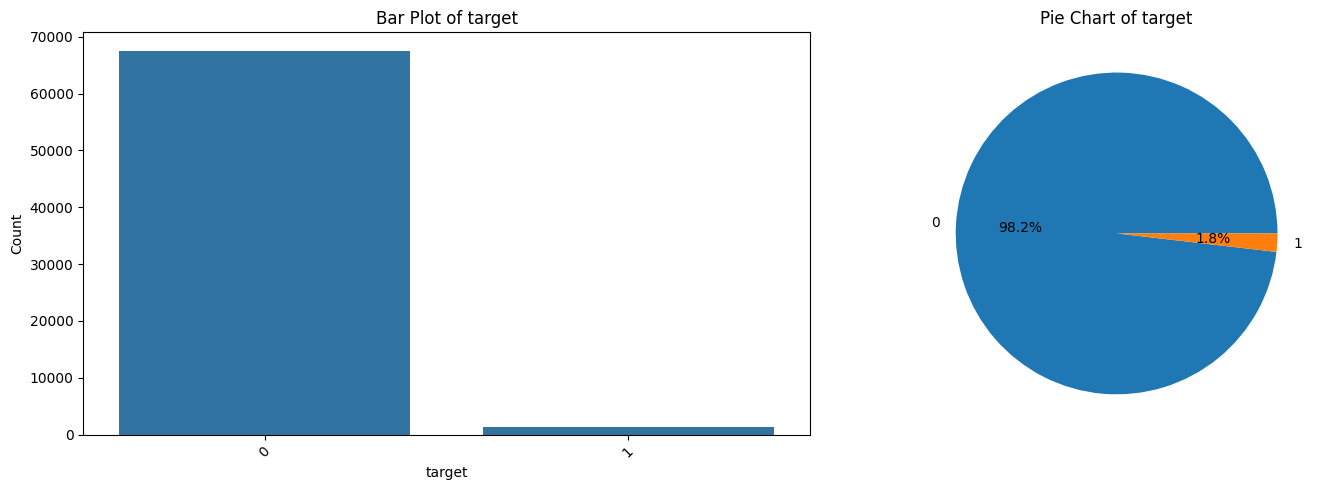

In [9]:
plot_categorical(train, 'target')

##### You can see the dataset is highly imbalanced , and this is expected in loan default scenarios, So find  ways to deal with the  imbalance

### CONTINUOUS COLUMN EXPLORATION

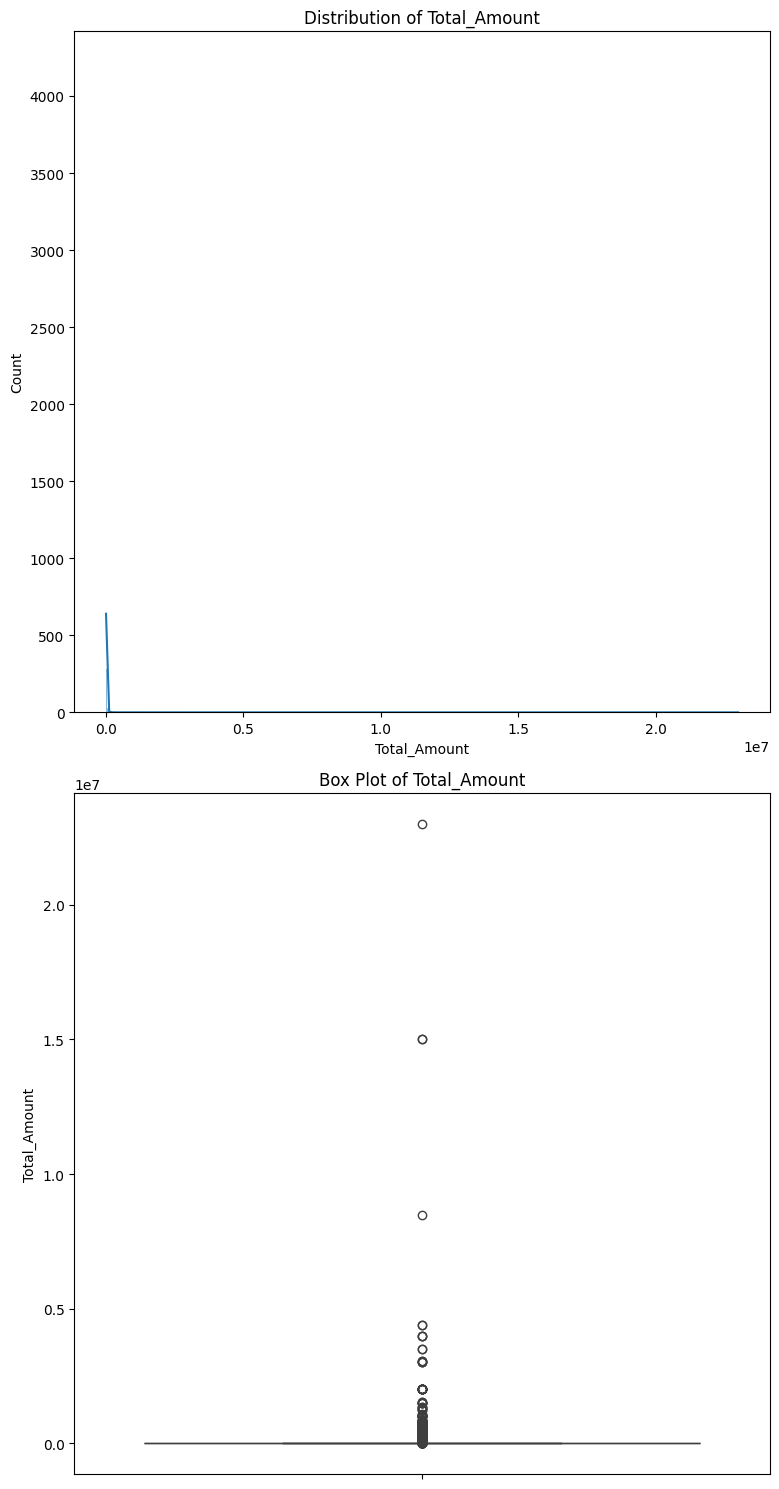

In [10]:
plot_continuous(train, 'Total_Amount')

Are those outliers?
##### You can explore more of the given numerical columns as well

### Feature Engineering
* So here we are going to concatenate both the train and test so that we can do the processing once instead of repeating for each

In [11]:
data = pd.concat([train, test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)
# we are going to one  hot encode the loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
# Convert all the columns with prefix loan_type_ to 0/1 instead of False/True
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label-encoding for the other remaining categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])


# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well

# Splitting the data back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]

test_df = data[data['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year']
----------------------------------------------------------------------------------------------------
The shape of train_df is: (68654, 45)
The shape of test_df is: (18594, 45)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df[features_for_modelling], train['target'], stratify=train['target'], shuffle=True, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(51490, 40) (17164, 40) (51490,) (17164,)


## Initialisation & Model Training

F1 Score: 0.2615
ROC AUC Score: 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     16849
           1       0.16      0.80      0.26       315

    accuracy                           0.92     17164
   macro avg       0.58      0.86      0.61     17164
weighted avg       0.98      0.92      0.94     17164



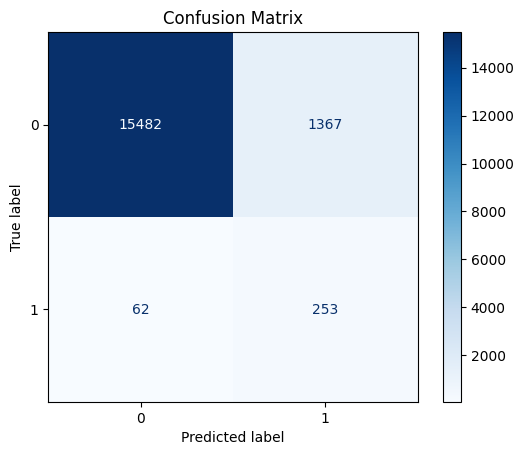

In [13]:

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_valid_scaled)
y_pred_proba = clf.predict_proba(X_valid_scaled)[:, 1]

# Evaluation Metrics
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_pred,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


### FEATURE IMPORTANCE

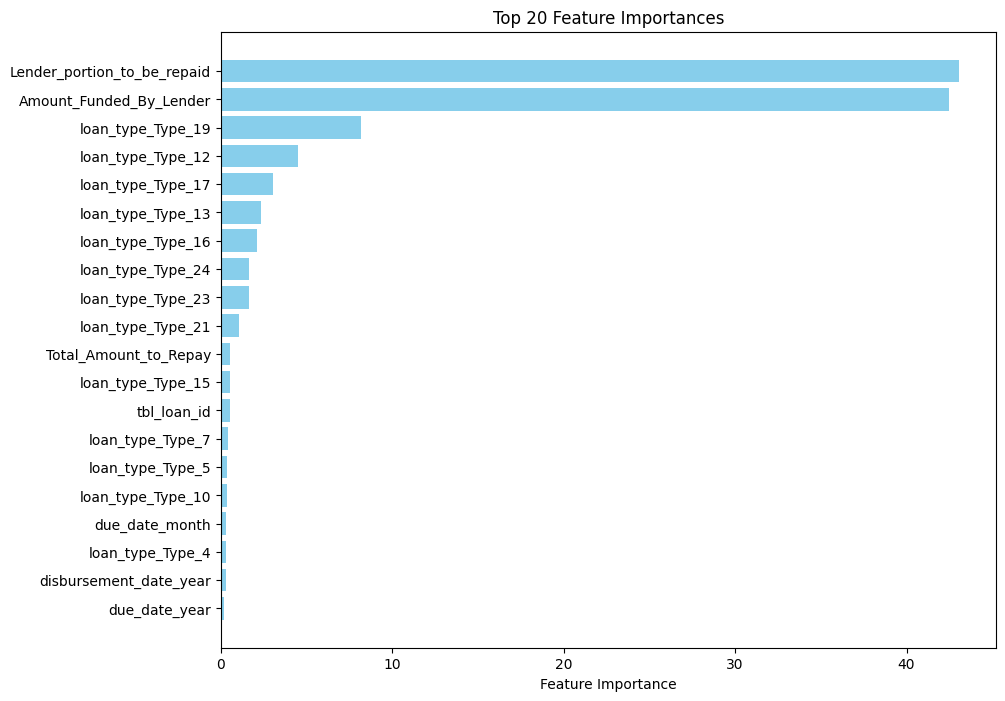

In [14]:
# Feature Importance

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

## Model Prediction & Inference

In [15]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features_for_modelling])
test_predictions_proba = clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Save the predictions to a CSV file

test_df['target'] = test_predictions
sub =  test_df[['ID', 'target']]
sub.head()


ID  target
68654  ID_269404226088267278       0
68655  ID_255356300042267278       0
68656  ID_257026243764267278       0
68657  ID_264617299409267278       0
68658  ID_247613296713267278       0

In [16]:
sub.to_csv('baseline_submission.csv', index=False)

#### To Do
* Handle imbalance
* Do more feature engineering
* Use more sophisticated machine learning algorithms
##### Good luck

train['target].value_counts()